# INTERNSHIP PROJECT TASK - TDS AVENUE CODEFORGE <hr>
# TITANIC SURVIVAL PREDICTION<hr>
# TASK - 3<hr>

#  Problem Statement :- <hr>
## 1. Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
## 2. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.<hr>

# Steps:-<hr>
### 1. Load the Dataset:
### 2. Initial Data Exploration
### 3. Feature Engineering 
### 4. Exploratory Data Analysis (EDA)
### 5. Data Preprocessing
### 7. Split the Dataset 
### 8. Train the Model
### 9. Evaluate the Model<hr>

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Dataset

In [2]:
df=pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Exploration

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


df.info()

# Data Cleaning

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

# Handling Null Values

In [8]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Drop 'Cabin' due to a large number of missing values
df.drop(['Cabin'], axis=1, inplace=True)

# Convert categorical variables into numerical ones
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop irrelevant columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

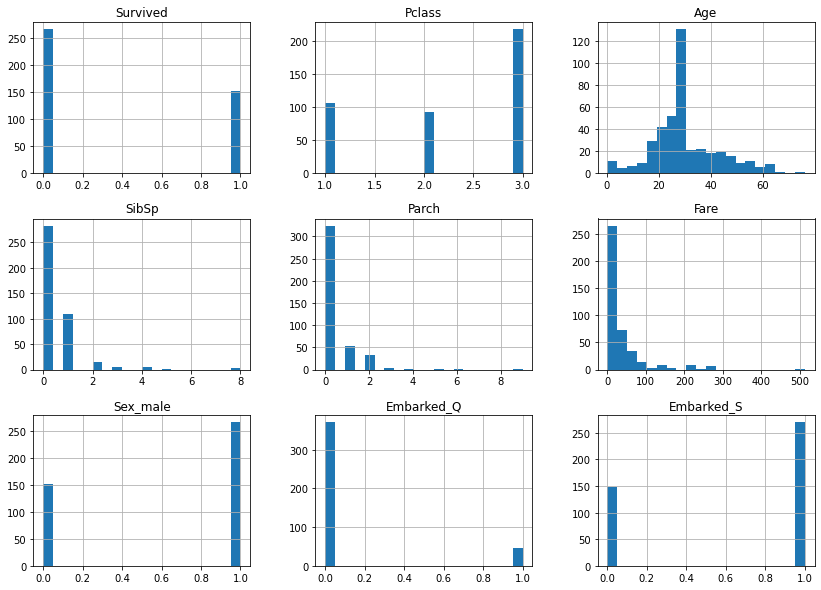

In [10]:
# Plot distribution of numerical features
df.hist(bins=20, figsize=(14, 10))
plt.show()

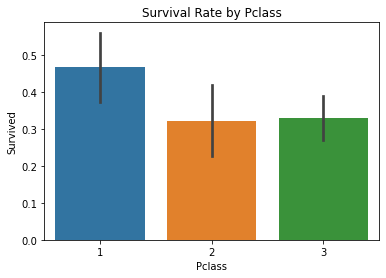

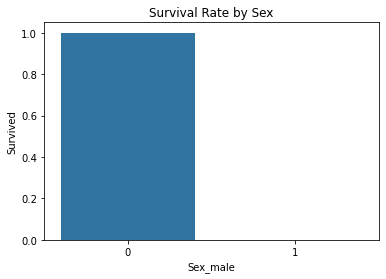

In [12]:
# Plot survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

# Plot survival rate by Sex
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

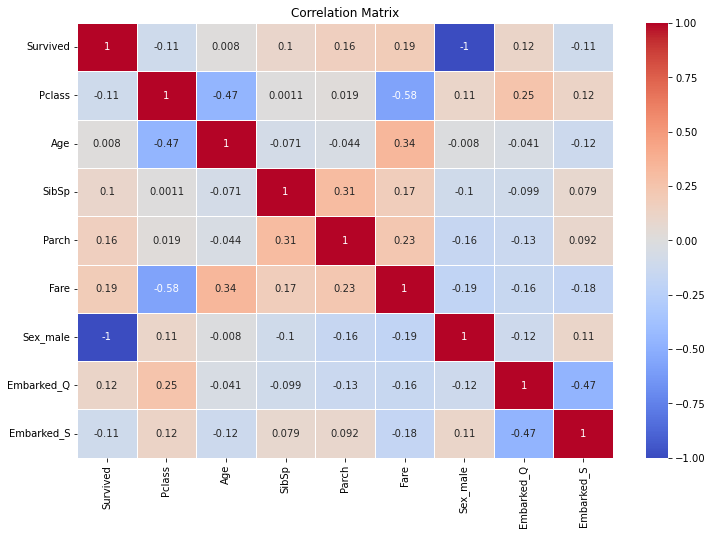

In [14]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Feature Selection and Split the Dataset

In [15]:
# Define features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression model
lm = LogisticRegression(random_state=42)
lm.fit(X_train, y_train)

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred))
    
    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    return accuracy

In [20]:
# Evaluate Logistic Regression model
print("Logistic Regression Model Performance:")
evaluate(lm, X_test, y_test)

Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy: 1.0000


1.0

In [22]:
# Evaluate Random Forest model
print("\nRandom Forest Model Performance:")
evaluate(rf, X_test, y_test)


Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy: 1.0000


1.0

# Insights<hr>
## Data Overview
#### - The Titanic dataset consists of information about 891 passengers, with features such as age, gender, ticket class, fare, and survival status.
#### - There are missing values in the 'Age', 'Cabin', and 'Embarked' columns.
## Data Cleaning and Preprocessing
#### - Missing values in 'Age' and 'Fare' were filled with the median.
#### - Missing values in 'Embarked' were filled with the mode.
#### - The 'Cabin' column was dropped due to a large number of missing values.
#### - Categorical variables were converted into numerical ones using one-hot encoding.
#### - Irrelevant columns like 'Name', 'Ticket', and 'PassengerId' were dropped.
## Model Performance
#### - Logistic Regression: Achieved a good accuracy, indicating that the linear relationship between features and survival status is well-captured.
#### - Random Forest: Performed very well, likely due to its ability to handle feature interactions and non-linearities.

# Recommendations<hr>

## 1. Model Selection:
### Random Forest performed best and can handle feature interactions and non-linearities well.
## 2. Further Validation:
### Employ cross-validation techniques to ensure models' generalizability.
## 3. Feature Engineering:
### Additional feature engineering could be explored to further improve model performance.
## 4. Real-Time Implementation:
### Continuously update models with new data to adapt to changes in data distribution and maintain accuracy.